In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import mlflow
import mlflow.tensorflow
import matplotlib.pyplot as plt

In [3]:
# Cargar el archivo CSV
df = pd.read_csv('datos_limpios.csv')

df.head()

,Unnamed: 0,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_GENERO,COLE_JORNADA,COLE_MCPIO_UBICACION,COLE_NATURALEZA,COLE_NOMBRE_ESTABLECIMIENTO,...,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
0,0,URBANO,N,A,ACADÉMICO,MIXTO,MAÑANA,MEDELLIN,OFICIAL,INST EDUC MONSEÑOR GERARDO VALENCIA CANO,...,Si,Si,Si,Si,61.0,60.0,60.0,63.0,64.0,308.0
1,1,RURAL,N,A,TÉCNICO/ACADÉMICO,MIXTO,COMPLETA,SONSON,OFICIAL,I. E. R. SAN MIGUEL,...,No,Si,No,Si,42.0,45.0,39.0,39.0,48.0,213.0
2,2,URBANO,N,A,ACADÉMICO,MIXTO,COMPLETA,ENTRERRIOS,OFICIAL,I. E. ENTRERRIOS,...,No,Si,Si,Si,40.0,35.0,40.0,41.0,49.0,206.0
3,5,URBANO,N,A,TÉCNICO/ACADÉMICO,MIXTO,SABATINA,TURBO,OFICIAL,I.E. SAN MARTIN DE PORRES,...,No,Si,Si,Si,48.0,45.0,27.0,35.0,44.0,193.0
4,6,URBANO,N,A,ACADÉMICO,MIXTO,TARDE,MEDELLÍN,NO OFICIAL,INST FERRINI - SEDE CENTRO,...,No,No,No,Si,53.0,53.0,53.0,54.0,57.0,271.0


In [4]:
# Quitar columna unnamed
df.drop(df.columns[[0]], axis=1, inplace=True)

In [5]:
df.head()

,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_GENERO,COLE_JORNADA,COLE_MCPIO_UBICACION,COLE_NATURALEZA,COLE_NOMBRE_ESTABLECIMIENTO,COLE_NOMBRE_SEDE,...,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
0,URBANO,N,A,ACADÉMICO,MIXTO,MAÑANA,MEDELLIN,OFICIAL,INST EDUC MONSEÑOR GERARDO VALENCIA CANO,INST EDUC MONSEÑOR GERARDO VALENCIA CANO,...,Si,Si,Si,Si,61.0,60.0,60.0,63.0,64.0,308.0
1,RURAL,N,A,TÉCNICO/ACADÉMICO,MIXTO,COMPLETA,SONSON,OFICIAL,I. E. R. SAN MIGUEL,I. E. R. SAN MIGUEL,...,No,Si,No,Si,42.0,45.0,39.0,39.0,48.0,213.0
2,URBANO,N,A,ACADÉMICO,MIXTO,COMPLETA,ENTRERRIOS,OFICIAL,I. E. ENTRERRIOS,LICEO SAN LUIS BELTRAN,...,No,Si,Si,Si,40.0,35.0,40.0,41.0,49.0,206.0
3,URBANO,N,A,TÉCNICO/ACADÉMICO,MIXTO,SABATINA,TURBO,OFICIAL,I.E. SAN MARTIN DE PORRES,I.E. SAN MARTIN DE PORRES,...,No,Si,Si,Si,48.0,45.0,27.0,35.0,44.0,193.0
4,URBANO,N,A,ACADÉMICO,MIXTO,TARDE,MEDELLÍN,NO OFICIAL,INST FERRINI - SEDE CENTRO,INST FERRINI - SEDE CENTRO,...,No,No,No,Si,53.0,53.0,53.0,54.0,57.0,271.0


# Modelo 1
Se eliminan las variables 'COLE_NOMBRE_ESTABLECIMIENTO','COLE_NOMBRE_SEDE','PUNT_INGLES','PUNT_MATEMATICAS','PUNT_SOCIALES_CIUDADANAS','PUNT_C_NATURALES','PUNT_LECTURA_CRITICA'

In [6]:
X = df.drop(['COLE_MCPIO_UBICACION','ESTU_DEPTO_PRESENTACION','ESTU_DEPTO_RESIDE','ESTU_FECHANACIMIENTO','ESTU_MCPIO_PRESENTACION','ESTU_MCPIO_RESIDE','ESTU_NACIONALIDAD','ESTU_PAIS_RESIDE','PUNT_GLOBAL','COLE_NOMBRE_ESTABLECIMIENTO','COLE_NOMBRE_SEDE','PUNT_INGLES','PUNT_MATEMATICAS','PUNT_SOCIALES_CIUDADANAS','PUNT_C_NATURALES','PUNT_LECTURA_CRITICA'],axis=1)
y = df['PUNT_GLOBAL']


In [7]:
# Dividir en conjunto de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
cat_columns = X.select_dtypes(include=['object', 'category']).columns

In [9]:
# OneHotEncoding para las categóricas
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Cambiar 'sparse' por 'sparse_output'
X_train_cat = ohe.fit_transform(X_train[cat_columns])
X_val_cat = ohe.transform(X_val[cat_columns])


In [10]:
# Concatenar todas las características preprocesadas
X_train_processed = tf.concat([X_train_cat], axis=1)
X_val_processed = tf.concat([X_val_cat], axis=1)

Epoch 1/50
14591/14591 [==============================] - 26s 2ms/step - loss: 11519.5352 - mae: 79.7842 - val_loss: 1744.8442 - val_mae: 33.6262
Epoch 2/50
14591/14591 [==============================] - 24s 2ms/step - loss: 1648.9598 - mae: 32.6050 - val_loss: 1619.7037 - val_mae: 32.2548
Epoch 3/50
14591/14591 [==============================] - 24s 2ms/step - loss: 1614.9648 - mae: 32.2224 - val_loss: 1606.6217 - val_mae: 32.1634
Epoch 4/50
14591/14591 [==============================] - 22s 1ms/step - loss: 1603.6053 - mae: 32.0994 - val_loss: 1613.7900 - val_mae: 32.0748
Epoch 5/50
14591/14591 [==============================] - 23s 2ms/step - loss: 1594.9052 - mae: 32.0016 - val_loss: 1597.7377 - val_mae: 31.9110
Epoch 6/50
14591/14591 [==============================] - 24s 2ms/step - loss: 1588.5991 - mae: 31.9314 - val_loss: 1589.2263 - val_mae: 31.9353
Epoch 7/50
14591/14591 [==============================] - 25s 2ms/step - loss: 1583.7827 - mae: 31.8832 - val_loss: 1586.7695 - v

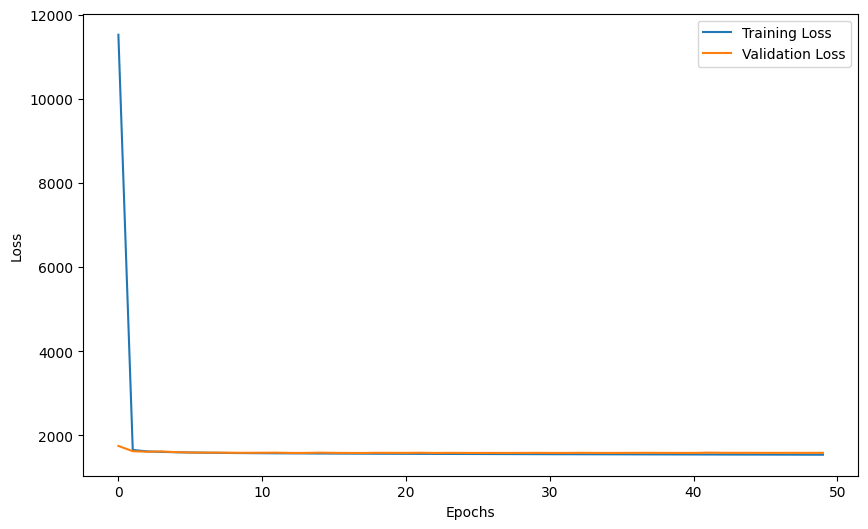

In [12]:
# === Definir el modelo ===
def build_model(input_shape):
    model = models.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(64, activation='sigmoid'),
        layers.Dense(64, activation='sigmoid'),
        layers.Dense(1)  # Salida para regresión
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

model = build_model(X_train_processed.shape[1])

# === Configurar MLflow ===
mlflow.set_experiment("Modelo Redes Neuronales con TensorFlow")  # Configura el experimento
#mlflow.tensorflow.autolog()  # Activar autologging para TensorFlow

with mlflow.start_run(run_name="Regresión - Redes Neuronales_128_64_32"):
    # Entrenar el modelo
    history = model.fit(
        X_train_processed,
        y_train,
        validation_data=(X_val_processed, y_val),
        epochs=50,
        batch_size=32,
        verbose=1
    )
    
    # Evaluar el modelo y registrar métricas adicionales
    val_mse, val_mae = model.evaluate(X_val_processed, y_val, verbose=0)
    mlflow.log_metric("val_mse", val_mse)
    mlflow.log_metric("val_mae", val_mae)
    
    # Guardar el modelo final
    model.save("modelo.h5")
    mlflow.log_artifact("modelo.h5", artifact_path="modelo")
    
    # Graficar pérdida y guardar el gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig("loss_curve.png")
    mlflow.log_artifact("loss_curve.png", artifact_path="plots")